<a href="https://colab.research.google.com/github/Kalana-Lakshan/tensorflow-learning/blob/main/classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install opendatasets

In [53]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf

In [54]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [55]:
data = pd.read_csv("/content/male-female-height-and-weight/Test set.csv")

In [56]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [57]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [58]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [59]:
x = data.drop(["Sex"],axis=1)
y = data["Sex"]

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=["Height","Weight"])

In [61]:
y = y.astype("int")

In [62]:
x.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


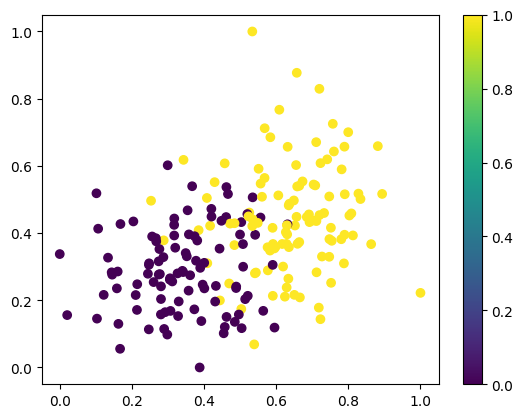

In [63]:
plt.scatter(x["Height"],x["Weight"],c=y)
plt.colorbar()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
x_train.shape, x_test.shape

((164, 2), (41, 2))

In [66]:
data.shape

(205, 3)

**Model Building**

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)
epoch_number = 10
history = model.fit(x_train,y_train,epochs = epoch_number)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4898 - loss: 0.7038
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3926 - loss: 0.6976
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5738 - loss: 0.6911
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4862 - loss: 0.6939
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5122 - loss: 0.6928
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5503 - loss: 0.6910 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5165 - loss: 0.6926
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5219 - loss: 0.6923
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4832 - loss: 0.6946
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4829 - loss: 0.6949


In [68]:
y.dtype

dtype('int64')

In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

Model Evaluation

In [70]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4815 - loss: 0.6949 


[0.6944447755813599, 0.4878048896789551]

In [71]:
y_predict = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [72]:
y_predict[:5]

array([[0.5160402],
       [0.5160402],
       [0.5160402],
       [0.5160402],
       [0.5160402]], dtype=float32)

In [73]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


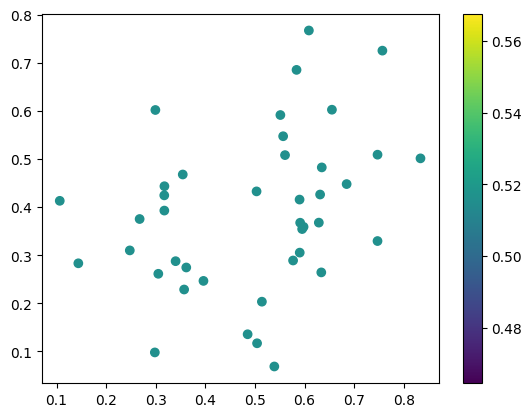

In [74]:
plt.scatter(x_test["Height"],x_test["Weight"],c=y_predict)
plt.colorbar()
plt.show()

In [75]:
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_predict)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4878048896789551>